# Welcome to Decision Trees and Support Vector Machines!


We are working with the same dataset we used during k-means. We can start by getting the imports in order below:

In [16]:
#import block
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from IPython.display import Image 
from pydot import graph_from_dot_data
from six import StringIO
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomForestClassifier

Next, let's get the data in order! 

In [2]:
## Import Data
song_pd = pd.read_csv("data.csv", sep = ",")
song_numpy = song_pd.to_numpy()

#Check out the data
print(song_pd.shape)
song_pd.head()

(195, 14)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


## Decision Tree
The first model I am going to use is a decision tree. For k-means, we used unsupervised machine learning. Decision trres are a form of supervised machine learning. This means that when the algorithm is trained, the training data includes whether or not the song was liked by the user. We want to separate the data by inputs (variables describing each song) and outputs (whether ot not the song was liked). We can do this below:

In [4]:
# Split the data into the input variables and the target classes
in_song = song_numpy[:,:-1]
out_song = song_numpy[:,-1]
var_names = list(song_pd.columns)[:-1]

#Look at what we have 
print(in_song[:])
print(out_song[:])
print("This is the output shape", out_song.shape)
print("This is the input shape", in_song.shape)

[[8.03000e-01 6.24000e-01 7.00000e+00 ... 9.59680e+01 3.04524e+05
  4.00000e+00]
 [7.62000e-01 7.03000e-01 1.00000e+01 ... 1.51329e+02 2.47178e+05
  4.00000e+00]
 [2.61000e-01 1.49000e-02 1.00000e+00 ... 7.52960e+01 2.86987e+05
  4.00000e+00]
 ...
 [4.99000e-01 3.51000e-01 9.00000e+00 ... 9.06640e+01 2.35947e+05
  4.00000e+00]
 [5.74000e-01 7.29000e-01 1.00000e+01 ... 1.10547e+02 1.90239e+05
  5.00000e+00]
 [7.47000e-01 6.66000e-01 1.10000e+01 ... 7.75070e+01 1.77213e+05
  4.00000e+00]]
[0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 

We also need to split the data into a train and test set. The training data is used to train the decision tree. We will return to the test set when evaluating and tuning the decision tree. We should set 10% of the data aside for testing and 90% of the data for training. We do this below:

In [5]:
#Split data into train/test and input/output frames
song_in_train,song_in_test,song_out_train,song_out_test=train_test_split(in_song, out_song, test_size=0.1, random_state=123)

Next, we can build the model. I also fit the training data to the deicison tree to view the picture of the decision tree. The picture describes how the data was split based on different variables. At the start of the decison tree, it is split by instrumentalness into a set of 78 samples and 97 samples. 

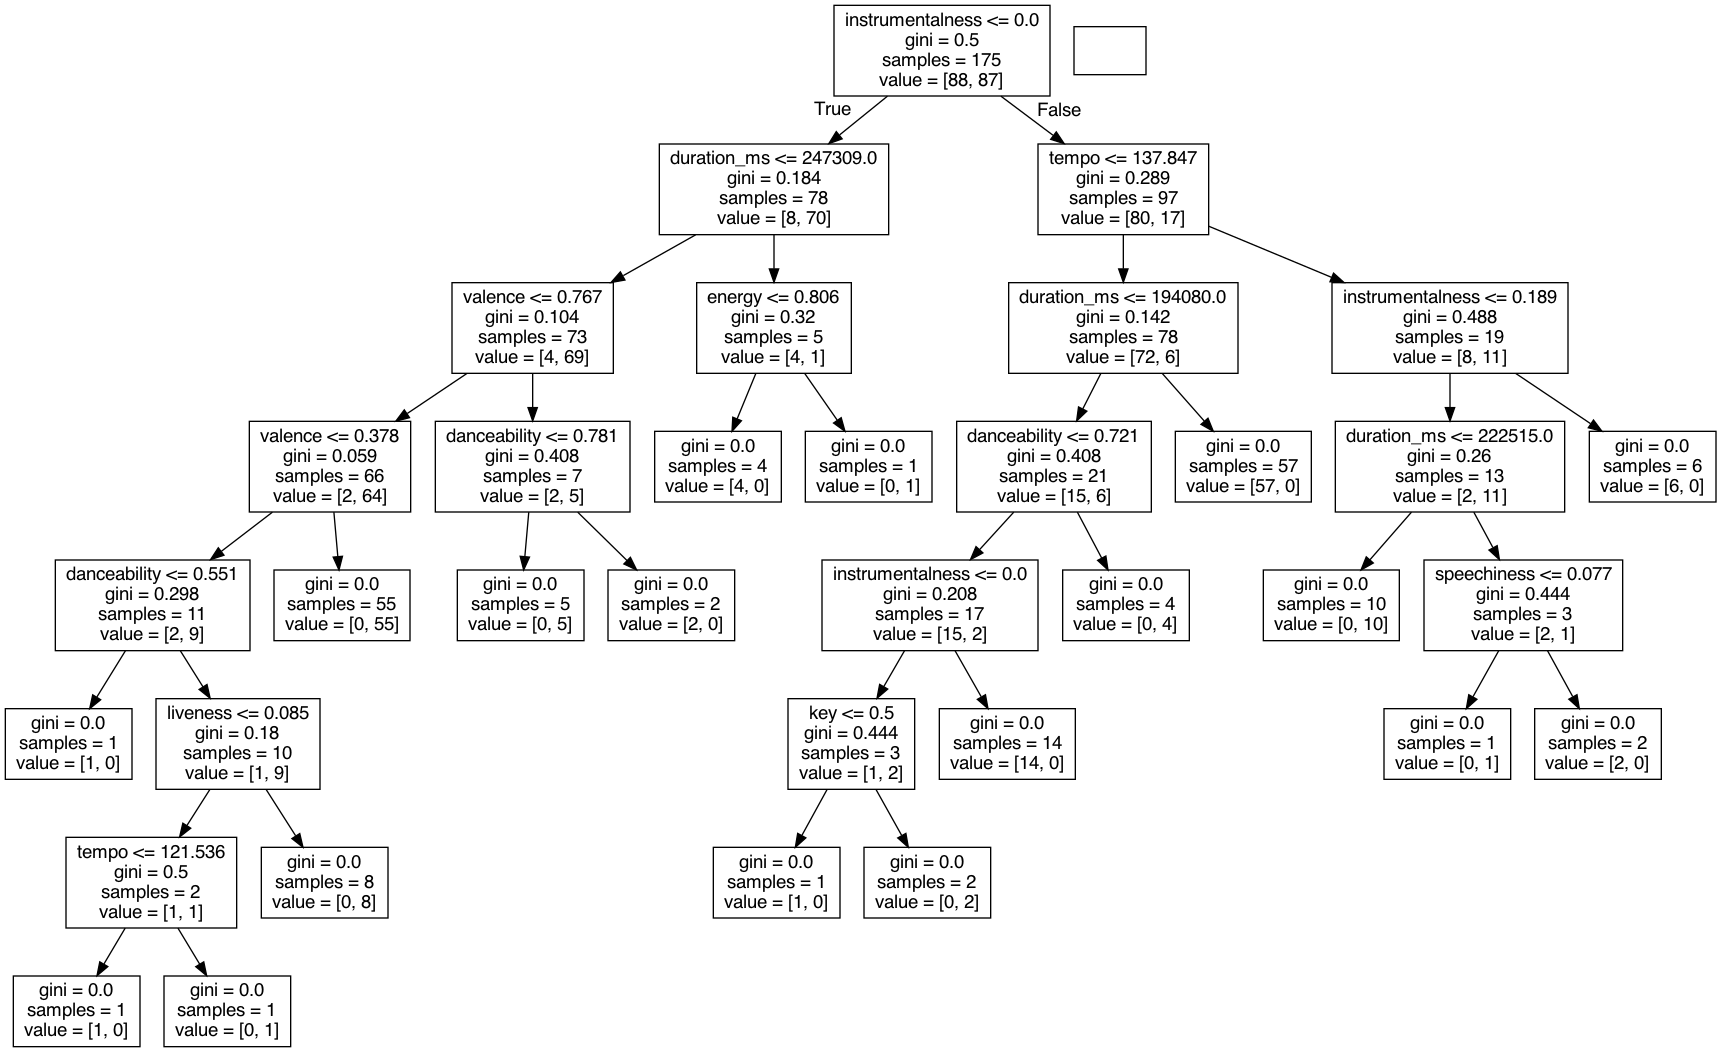

In [6]:
#make the model 
dt = DecisionTreeClassifier()

#fit to data just to see what it looks like
dt.fit(song_in_train, song_out_train)

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=var_names)
(dt_vis, ) = graph_from_dot_data(dot_data.getvalue())

Image(dt_vis.create_png())

We can compute the cross validation error for the decision tree we used by using the built in implementation for cross validation error below. Cross validation error splits the training inputs and outputs into 10 sets. The model will be fit to each set of the data and tested on the other set. The total error is calculated across all the sets of data that we tried. Then, we take the mean which gives us the average cross validation for the decision tree. We do this using the built-in methods below:

In [7]:
#compute cross validation score
dt_cv = cross_val_score(dt, song_in_train, song_out_train, cv=10)
dt_cv_mean = np.mean(dt_cv)
dt_cv_mean

0.8009803921568628

So we have that the average cross validation error of the decision tree is about .86.

## SVM

Now, we are going to try using a support vector machine to see if the cross validation is lower or higher than for the decision tree. A support vector machine is a similar concept to building a regression line. The support vector machien aims to draw a line that will go between the liked songs and the disliked songs. The goal is that the line will be accurate enough so that a song that is not in the training set will fall on the correct side of the support vector machine. We can keep a lot of the prepping of the data that we did above. However, because SVM requires a 2 dimensional dataset, we have to perform a reduction. The original dataset has 7 dimensions. Using dimension reduction and linear algebra, we can reduce the data to 2 dimensions. We can do this below:

In [8]:
#Performing data reduction 
U,S,Vt = np.linalg.svd(song_in_train,full_matrices=True)
umax = S.shape[0]
np.allclose(song_in_train, np.dot(U[:, :umax] * S, Vt))
song_in_train_two = U[:, :2] * S[:2]


#Checking our work
song_in_train_two.shape



(175, 2)

The functions below are used to plot the SVC decision function. This will be useful after we have fit the model. 

In [9]:
def plot_svc_decision_function(SVM, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate SVM model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = SVM.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(SVM.support_vectors_[:, 0],
                   SVM.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

def plot_supports(SVM, ax=None):
    """Plot the decision function for a 2D SVC"""
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Plot support vectors
    ax.scatter(SVM.support_vectors_[:, 0], 
               SVM.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

I chose to use rbf as the kernel because I wanted the function to be descriptive and flexible. In other words, I did not want the function to be limited to a linear function or polynomial. The kernel is a set of mathematical functions that perform linear manipulations on the set of data to make it easier to separate the data into categories. RBF stands for radial basis function. Now we can set up the SVM below:

In [10]:
c = 1E6
clf = SVC(kernel='rbf', C=c)

1000000.0


Next, we can compute cross validation of the SVC machine we made. This will tell us the average amount of errors we made for each subset of the training data. I am using the built in method again. 

In [11]:
clf_cv = cross_val_score(clf, song_in_train_two, song_out_train, cv = 10)
clf_cv_mean = np.mean(clf_cv)
clf_cv_mean

0.7532679738562091

Compating the cross validation errors form both of our models, we can see which model we should use to fit the rest of the data. 

In [13]:
if clf_cv_mean < dt_cv_mean:
    print("We should use the SVC model.")
else:
    print("We should use the decision tree model.")

We should use the SVC model.


We can see that the cross validation error for the decision tree was higher than the cross validation error for the SVC machine. So we should use the SVC model. We will now fit the model to the whole training set of data. Using the functions above, I am able to plot the SVC function. I chose to take out the supports because the graph looks more clear without them. 

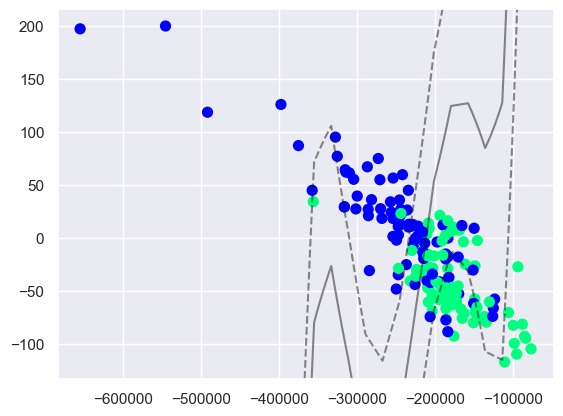

In [14]:
clf.fit(song_in_train_two, song_out_train)

plt.scatter(song_in_train_two[:, 0], song_in_train_two[:, 1], c=song_out_train, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False)

We can test to see how this model performs on the test set by predicting the class for each value in the test set and comparing it to its actual value. We can do this by directly predicting and comparing or we can use the built in implementation for calculating the score of the model on the test set. We divided the data above and we can use the same divisions here.

We have to make the input test set into two dimensions to match the training data. I will do that first and then calculate the score. 

In [15]:
#song_in_train, song_in_test, song_out_train, song_out_test

#Performing data reduction (sources from lab 6)
R,T,Qt = np.linalg.svd(song_in_test,full_matrices=True)
umax = T.shape[0]
np.allclose(song_in_test, np.dot(R[:, :umax] * T, Qt))
song_in_test_two = R[:, :2] * T[:2]


#Checking our work
print(song_in_test_two.shape[1])
print(type(song_in_test_two))


clf.score(song_in_test_two, song_out_test)

2
<class 'numpy.ndarray'>


0.8

So we have that the score of the model is 0.8. 

Contextualizing this score, we can say that we have built a model that can take in a two dimensional set of data representing songs and predict whether or not a user will like the song with 80% accuracy. This is so much better than our k-means!

Another method we can use to classify the data is a random forest. This is an ensemble method, meaning we combine multiple instances of a decision tree intho the same model to acheieve even higher results. We can start by building a random forest in sklearn. The number of estimators means the number of trees we use. The max features means the number of features the model is allowed to use. The depth refers to the amout of layers the model has. 

In [21]:
# Build the model
grove = RandomForestClassifier(n_estimators=10, max_features=13, max_depth=3, random_state=0)

Next, we can fit the model to our training data.

In [22]:
# Fit our model to the data
grove.fit(song_in_train, song_out_train)

RandomForestClassifier(max_depth=3, max_features=13, n_estimators=10,
                       random_state=0)

Something that is really cool about the random forest method is that we can see the importance of each feature in the data as the decision trees make decsions. 

In [23]:
print(list(song_pd.columns[:-1]))
print(grove.feature_importances_)

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
[0.07881001 0.         0.00769991 0.01383526 0.         0.02221526
 0.00442467 0.64454769 0.00236638 0.01285131 0.06717044 0.14607908
 0.        ]


According to this, we can see that the feature of the most importance have the highest corresponding number. So instrumentalness and duration are the most important indicators of whether or not a song will be liked.

Finally, we can see how well the model did on just the training data. 

In [25]:
grove.score(song_in_train, song_out_train)

0.96

Above, we can see that the model categorized the training data at 96% accuracy! This is so good and better than all of our previous attempts! Let's try calculating the score for how well it does on the testing data. 

In [26]:
grove.score(song_in_test, song_out_test)

0.8

Although it is lower than the accuracy with the training data, it is at the same mark as the SVM we worked through above. The accuracy on the test data for the random forest is 80%. This is still really good and we were able to gain valuable information about what sort of features are most important in figuring out whether the user liked the song. 